In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.append(r'C:\Frank\UoT 2024-2025\MIE8888 Project\M18\RUIWU') 
from helper_functions import * # Import Ruiwu's helper functions for data cleaning, slicing and aggregating
import os

#  Loading Data

In [ ]:
# Read Current Data
full_dataset = r"C:\Frank\UoT 2024-2025\MIE8888 Project\full_dataset_2.11.csv"
svd_data = r"C:\Frank\UoT 2024-2025\MIE8888 Project\df_svd.csv"
v1_data = r"C:\Frank\UoT 2024-2025\MIE8888 Project\M22\df_v1.csv"
v3_data = r"C:\Frank\UoT 2024-2025\MIE8888 Project\M22\df_v3.csv"
v1v3_data = r"C:\Frank\UoT 2024-2025\MIE8888 Project\M22\df_v1_v3.csv"
v1_svd = r"C:\Frank\UoT 2024-2025\MIE8888 Project\M22\df_svd_v1.csv"
v3_svd = r"C:\Frank\UoT 2024-2025\MIE8888 Project\M22\df_svd_v3.csv"
v1v3_svd = r"C:\Frank\UoT 2024-2025\MIE8888 Project\M22\df_svd_v1_v3.csv"


df = pd.read_csv(full_dataset, encoding="Windows-1252")
df_v1 = pd.read_csv(v1_data, encoding="Windows-1252")
df_v3 = pd.read_csv(v3_data, encoding="Windows-1252")
df_v1_v3 = pd.read_csv(v1v3_data, encoding="Windows-1252")
df_svd = pd.read_csv(svd_data, encoding="Windows-1252")
df_svd_v1 = pd.read_csv(v1_svd, encoding="Windows-1252")
df_svd_v3 = pd.read_csv(v3_svd, encoding="Windows-1252")
df_svd_v1_v3 = pd.read_csv(v1v3_svd, encoding="Windows-1252")

C:\Users\frank\AppData\Local\Temp\ipykernel_2172\3125806628.py:12: DtypeWarning: Columns (1,4,10,16,52,85,86,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(full_dataset, encoding="Windows-1252")


In [55]:
df_svd

,provider_x,amount,treatment_plan_status,patient_id,city,state_y,sikka_provider_id,LATITUDE,LONGITUDE,procedure_age,...,SVD_94,SVD_95,SVD_96,SVD_97,SVD_98,SVD_99,SVD_100,Kmeans_cluster,gmm_cluster,Agg_cluster
0,1,663.00,1,1,0,0,0,43.818875,-79.559466,55.693151,...,0.418749,-0.268478,-0.459666,-0.326420,1.408708,0.994770,0.192471,3,3,0
1,7,77.19,0,2,0,0,0,43.818875,-79.559466,41.287671,...,-1.128762,-1.012749,-0.084358,-0.711287,-0.395388,0.613275,0.074925,3,3,0
2,5,19.96,0,3,0,0,0,43.818875,-79.559466,24.797260,...,0.171720,-0.255636,-0.013390,0.474894,0.300367,-0.243592,0.265608,3,0,0
3,7,55.49,0,4,0,0,0,43.835469,-79.555076,15.202740,...,-0.312076,-0.171364,0.058218,-1.386143,-0.632145,-0.839857,1.715160,3,3,0
4,1,220.00,1,5,0,0,0,43.818875,-79.559466,20.156164,...,-0.113327,0.063478,0.000552,-0.151971,0.158655,0.031298,0.016163,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10253,10,8.75,1,13579,0,0,0,43.838741,-79.563329,10.989041,...,0.251203,0.078569,-0.247758,-0.088183,-0.133617,0.008568,-0.066537,3,0,0
10254,10,30.15,1,13580,0,0,0,43.838741,-79.563329,6.621918,...,0.559763,-0.378192,0.501527,0.180905,-0.128073,0.051764,-0.046494,3,0,0
10255,11,160.14,0,13583,12,0,0,43.840925,-79.551739,8.013699,...,0.025020,0.052504,0.037267,0.025919,-0.034039,0.031956,-0.011931,3,0,0
10256,2,0.00,2,13584,9,0,2,43.671953,-79.399170,39.789041,...,-0.005024,0.015098,0.032073,-0.010145,-0.012431,0.015550,0.046990,3,0,0


# Apply Clustering on V1 V3 data and full data

In [3]:
# clustering group mapping
df_sv_kmeans, kmeans, scaler = cluster_patients_kmeans(df_svd_v1_v3, n_clusters=4)
cluster_map_kmeans = df_sv_kmeans[['patient_id', 'Kmeans_cluster']]
df_sv_gmm, gmm, scaler_gmm = cluster_patients_gmm(df_svd_v1_v3, n_clusters=4)
cluster_map_gmm = df_sv_gmm[['patient_id', 'gmm_cluster']]
df_sv_agg, agg, scaler_agg = cluster_patients_agglomerative(df_svd_v1_v3, n_clusters=4)
cluster_map_agg = df_sv_agg[['patient_id', 'Agg_cluster']]

In [4]:
folder_path_v1v3 = r"C:\Frank\UoT 2024-2025\MIE8888 Project\M21\Split dataframe yearly v1v3"
annotated_v1v3 = annotate_age_group_files(folder_path_v1v3, cluster_map_kmeans, cluster_map_gmm, cluster_map_agg)

In [5]:
# example of annotated_v1v3[age]
annotated_v1v3[40]

,provider_x,amount,treatment_plan_status,procedure_date,patient_id,birth_date,city,state_y,first_visit,last_visit,...,treatment_category_17,treatment_category_18,treatment_category_19,treatment_category_20,treatment_category_21,version,age_group,Kmeans_cluster,gmm_cluster,Agg_cluster
0,3,45.00,0,1997-07-03,3737,1957-05-06,2,0,1993-10-13,2012-04-19,...,False,False,False,False,False,V3,40,3,2,0
1,1,351.98,0,2007-06-25,8893,1966-11-16,8,0,2004-11-11,2011-10-11,...,False,False,False,False,False,V1,40,3,1,0
2,4,23.66,0,2007-06-12,6055,1966-09-25,19,0,1997-11-13,2024-11-06,...,False,False,False,False,False,V3,40,1,1,0
3,1,177.41,0,2007-04-14,8893,1966-11-16,8,0,2004-11-11,2011-10-11,...,False,False,False,False,False,V1,40,3,1,0
4,1,174.45,0,2007-05-16,2061,1966-08-30,0,0,1990-11-01,2024-09-23,...,False,False,False,False,False,V3,40,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4818,1,84.91,0,2007-09-26,9318,1967-09-19,81,0,2006-05-04,2017-06-29,...,False,False,False,False,False,V1,40,3,1,0
4819,1,174.45,0,2007-09-19,8550,1967-03-15,9,0,2004-01-16,2024-07-16,...,False,False,False,False,False,V3,40,1,1,0
4820,2,19.36,0,2000-03-29,5685,1960-03-23,0,0,1997-02-03,2007-09-13,...,False,False,False,False,False,V3,40,1,1,0
4821,3,94.83,0,1999-08-31,3315,1959-04-07,0,0,1995-12-04,2024-09-11,...,False,False,False,False,False,V3,40,3,1,1


In [11]:
# clustering group mapping
df_sv_kmeans, kmeans, scaler = cluster_patients_kmeans(df_svd, n_clusters=4)
cluster_map_kmeans = df_sv_kmeans[['patient_id', 'Kmeans_cluster']]
df_sv_gmm, gmm, scaler_gmm = cluster_patients_gmm(df_svd, n_clusters=4)
cluster_map_gmm = df_sv_gmm[['patient_id', 'gmm_cluster']]
df_sv_agg, agg, scaler_agg = cluster_patients_agglomerative(df_svd, n_clusters=4)
cluster_map_agg = df_sv_agg[['patient_id', 'Agg_cluster']]

folder_path_full = r"C:\Frank\UoT 2024-2025\MIE8888 Project\M19\Split dataframe yearly"
annotated_full = annotate_age_group_files(folder_path_full, cluster_map_kmeans, cluster_map_gmm, cluster_map_agg)
annotated_full[40]

,provider_x,amount,treatment_plan_status,procedure_date,patient_id,birth_date,city,state_y,first_visit,last_visit,...,treatment_category_16,treatment_category_17,treatment_category_18,treatment_category_19,treatment_category_20,treatment_category_21,age_group,Kmeans_cluster,gmm_cluster,Agg_cluster
0,3,45.00,0,1997-07-03,3737,1957-05-06,2,0,1993-10-13,2012-04-19,...,False,False,False,False,False,False,40,3,3,0
1,1,351.98,0,2007-06-25,8893,1966-11-16,8,0,2004-11-11,2011-10-11,...,False,False,False,False,False,False,40,3,3,0
2,4,23.66,0,2007-06-12,6055,1966-09-25,19,0,1997-11-13,2024-11-06,...,False,False,False,False,False,False,40,3,3,0
3,1,177.41,0,2007-04-14,8893,1966-11-16,8,0,2004-11-11,2011-10-11,...,False,False,False,False,False,False,40,3,3,0
4,1,174.45,0,2007-05-16,2061,1966-08-30,0,0,1990-11-01,2024-09-23,...,False,False,False,False,False,False,40,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5493,1,84.91,0,2007-09-26,9318,1967-09-19,81,0,2006-05-04,2017-06-29,...,False,False,False,False,False,False,40,3,3,0
5494,1,174.45,0,2007-09-19,8550,1967-03-15,9,0,2004-01-16,2024-07-16,...,False,False,False,False,False,False,40,3,3,0
5495,2,19.36,0,2000-03-29,5685,1960-03-23,0,0,1997-02-03,2007-09-13,...,False,False,False,False,False,False,40,3,3,0
5496,3,94.83,0,1999-08-31,3315,1959-04-07,0,0,1995-12-04,2024-09-11,...,False,False,False,False,False,False,40,3,3,0


# Trajectory Dictionary

In [30]:
from collections import defaultdict

def build_trajectory_dict(annotated_age_groups, cluster_col, procedure_prefix="procedure_code_y_"):
    """
    trajectory_dict[cluster][age] = procedures (list)
    """
    trajectory_dict = defaultdict(dict)

    for age, df in annotated_age_groups.items():
        procedure_cols = [col for col in df.columns if col.startswith(procedure_prefix)]

        for cluster_id in df[cluster_col].dropna().unique():
            sub_df = df[df[cluster_col] == cluster_id]
            if sub_df.empty:
                continue

            proc_counts = sub_df[procedure_cols].sum().sort_values(ascending=False)
            top_procs = [col.replace(procedure_prefix, "") for col in proc_counts.head(5).index]
            trajectory_dict[int(cluster_id)][age] = top_procs

    return trajectory_dict

In [31]:
trajectory_dict_v1v3_kmeans = build_trajectory_dict(annotated_v1v3, cluster_col="Kmeans_cluster")
trajectory_dict_v1v3_gmm = build_trajectory_dict(annotated_v1v3, cluster_col="gmm_cluster")
trajectory_dict_v1v3_agg = build_trajectory_dict(annotated_v1v3, cluster_col="Agg_cluster")

In [32]:
trajectory_dict_v1v3_gmm[2]

{28: ['1203', '43400', '11303', '1011', '49101'],
 29: ['12400', '11300', '2600', '11303', '2112'],
 30: ['2142', '2112', '1203', '43412', '2601'],
 31: ['2142', '43412', '1103', '11303', '12101'],
 32: ['2142', '43413', '2112', '12101', '1203'],
 33: ['12101', '1103', '2142', '2112', '2601'],
 34: ['2142', '12101', '2144', '43413', '11303'],
 35: ['12101', '43412', '2144', '1103', '1203'],
 36: ['12101', '1103', '2142', '2601', '2144'],
 37: ['12101', '2144', '1103', '2601', '1203'],
 38: ['12101', '2144', '1103', '2601', '1203'],
 39: ['12101', '2144', '1204', '1103', '43413'],
 40: ['12101', '2144', '1204', '11113', '2601'],
 41: ['12101', '1204', '2144', '11114', '11113'],
 42: ['12101', '1204', '2144', '11114', '11113'],
 43: ['12101', '1204', '11114', '11113', '2144'],
 44: ['12101', '1204', '11113', '11114', '2144'],
 45: ['12101', '1204', '11114', '11113', '2144'],
 46: ['12101', '11113', '11114', '1204', '2144'],
 47: ['12101', '1204', '11113', '11114', '2144'],
 48: ['11113',

# Statistical Analysis

## 1. Patient Retention Across Age Groups (Should use fulld data) 
How many patients continue treatment across multiple age groups

In [12]:
age_groups = sorted(annotated_full.keys())
retention = {}

for i in range(len(age_groups) - 1):
    current = annotated_full[age_groups[i]]['patient_id'].unique()
    next_ = annotated_full[age_groups[i + 1]]['patient_id'].unique()
    retained = set(current) & set(next_)
    transition_label = f"{age_groups[i]} to {age_groups[i + 1]}"
    retention[transition_label] = len(retained) / len(current)

# Use a custom sort that extracts the numeric start of each range
sorted_retention = dict(sorted(
    retention.items(),
    key=lambda x: int(x[0].split()[0])
))

Patient_retention = pd.Series(sorted_retention)
Patient_retention

0 to 1      0.541667
1 to 2      0.414634
2 to 3      0.727969
3 to 4      0.634884
4 to 5      0.677487
              ...   
92 to 93    0.428571
93 to 95    0.000000
95 to 96    1.000000
96 to 97    0.000000
97 to 99    0.000000
Length: 97, dtype: float64

In [ ]:
retention_df = Patient_retention.reset_index()
retention_df.columns = ['range', 'retention']

# Extract starting age
retention_df['start_age'] = retention_df['range'].apply(lambda x: int(x.split(" to ")[0]))

# Group into 10-year bins
retention_df['age_bin'] = (retention_df['start_age'] // 10) * 10

# Calculate mean retention per 10-year group
mean_retention_by_decade = retention_df.groupby('age_bin')['retention'].mean()

mean_retention_by_decade.index = [f"{i}–{i+10}" for i in mean_retention_by_decade.index]
print(mean_retention_by_decade)

0–10      0.677070
10–20     0.748678
20–30     0.682168
30–40     0.695517
40–50     0.728218
50–60     0.726569
60–70     0.677772
70–80     0.627211
80–90     0.484065
90–100    0.297359
Name: retention, dtype: float64


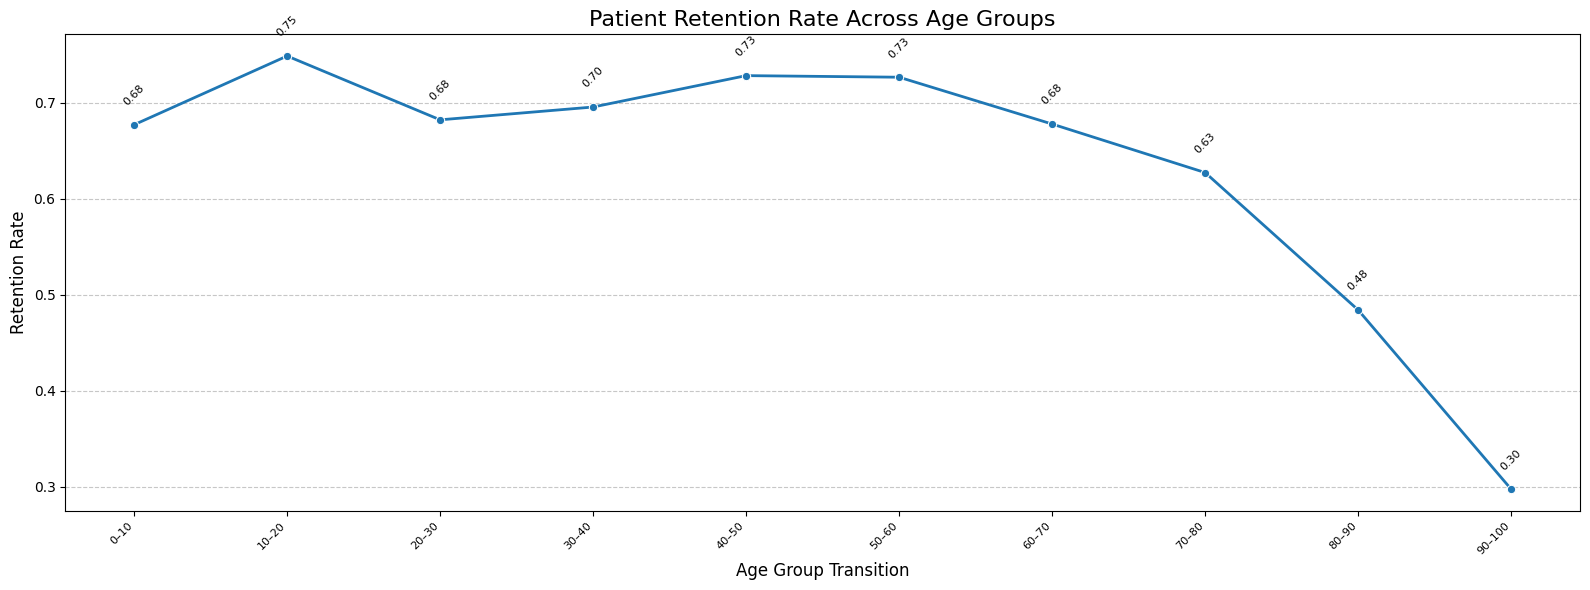

In [21]:
import seaborn as sns

retention_series  = mean_retention_by_decade
plt.figure(figsize=(16, 6))
sns.lineplot(x=retention_series.index, y=retention_series.values, marker='o', linewidth=2)
plt.xticks(rotation=45, ha='right', fontsize= 8)
plt.yticks()

# Grid and labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Patient Retention Rate Across Age Groups", fontsize=16)
plt.xlabel("Age Group Transition", fontsize=12)
plt.ylabel("Retention Rate", fontsize=12)

# Add value labels for selected points
for x, y in zip(retention_series.index, retention_series.values):
    if y < 1 or y > 0:  # label only outliers
        plt.text(x, y + 0.02, f"{y:.2f}", ha='center', fontsize=8, rotation=45)

plt.tight_layout()
plt.show()

## 2. Cluster Evolution Over Time
Aiming to use cluster transition analysis (e.g., from Kmeans_cluster) to uncover how patient care patterns evolve

## 3. Early Risk Indicators

Detect which early procedures (in age 30–40) correlate with high-risk events like root canals in later ages. e.g., Track patients who appear in age 30–40 with certain procedure codes and look up their outcomes at age 50+

The Chi square test compares the observed frequency of a procedure in each class (e.g., root canal vs no root canal) to what would be expected if there were no relationship. A high score means what we observe is unlikely to be random.

### Preparation

In [23]:
# From ver2_dhaval_insights_root_Canal.ipynb

ALL_FEATURES = {
    # Preventive
    "polishing": [11101, 11107],
    "fluoride_custom_appliances": [12601, 12602],
    "medication_custom_appliances": [12701, 12702],
    "pit_and_fissure_sealants": [13401, 13409],
    "preventive_restorative_resin": [13411, 13419],
    "bruxism_periodontal_appliances": [14611, 14612],
    "tmj_appliances": [14711, 14712, 14721, 14722],
    "recontouring_of_natural_teeth_for_functional_reasons": [16401, 16409],
    "occlusion_adjustment": [16511, 16512, 16513, 16514, 16519],
    # Restorative
    "caries_trauma_pain_control": [20111, 20119, 20121, 20129, 20131, 20139],
    "restorations_amalgam": [21114, 21115, 21214, 21215, 21224, 21225, 23324, 23325, 21301, 21302],
    "pins_retentive": [21401, 21402, 21403, 21404, 21405],
    "posts_prefabricated_retentive": [25731, 25732, 25733],
    "restorations_prefabricated_plastic_permanent_teeth": [22501, 22511],
    "restorations_tooth_coloured": [23104, 23105, 23314, 23315, 23514, 23515, 23601, 23602],
    "restorations_onlays_cast_metal_indirect": [25511],
    "restorations_onlays_composite_compomer_processed_bonded": [25521],
    "restorations_onlays_porcelain_ceramic_polymer_glass_bonded": [25531],
    "posts_cast_metal_separate_procedure": [25711, 25712, 25713],
    "posts_cast_metal_concurrent_with_impression": [25721, 25722, 25723],
    "posts_prefabricated_retentive_cast_core": [25741, 25742, 25743],
    "posts_prefabricated_non_bonded_core": [25751, 25752, 25753, 25754, 25755, 25756],
    "posts_prefabricated_bonded_core": [25761, 25762, 25763, 25764, 25765, 25766],
    "post_removal": [25781, 25782, 25783, 25784, 25789],
    "crowns_acrylic_composite_compomer_indirect": [27111, 27113, 27115],
    "crowns_acrylic_composite_compomer_direct": [27121, 27125],
    "crowns_acrylic_composite_compomer_cast_metal_base": [27131, 27135],
    "crowns_porcelain_ceramic_polymer_glass": [27201, 27205],
    "crowns_porcelain_ceramic_polymer_glass_fused_to_metal": [27211, 27215],
    "crowns_cast_metal": [27301, 27305],
    "crowns_existing_partial_denture_clasp": [27401, 27409],
    "tooth_preparation_for_overdentures": [28101],
    "recementation_rebonding": [29101, 29102, 29103, 29104],
    "reinsertion_recementation_implant_supported_crown": [29111, 29112, 29113, 29114],
    "removal_inlays_onlays_crowns_veneers": [29301, 29302, 29303, 29304],
    "removal_implant_supported_crowns": [29311, 29312, 29313, 29314],
    # Endodontic
    "pulpotomy_permanent_teeth": [32221, 32222],
    "pulpotomy_primary_teeth": [32231, 32232],
    "pulpotomy_permanent_teeth_concurrent": [32241, 32242],
    "pulpectomy_permanent_teeth": [32311, 32312, 32313, 32314],
    "pulpectomy_primary_teeth": [32321, 32322],
    "apexification_apexogenesis": [33601, 33602, 33603, 33604],
    "reinsertion_dentogenic_media": [33611, 33612, 33613, 33614],
    "obturation_apexified_canal": [33621, 33622, 33623, 33624],
    "apicoectomy_maxillary_anterior": [34111, 34112],
    "apicoectomy_maxillary_bicuspid": [34121, 34122, 34123],
    "apicoectomy_maxillary_molar": [34131, 34132, 34133, 34134],
    "apicoectomy_mandibular_anterior": [34141, 34142],
    "apicoectomy_mandibular_bicuspid": [34151, 34152, 34153],
    "apicoectomy_mandibular_molar": [34161, 34162, 34163, 34164],
    "retrofill_maxillary_anterior": [34211, 34212],
    "retrofill_maxillary_bicuspid": [34221, 34222, 34223, 34224],
    "retrofill_maxillary_molar": [34231, 34232, 34233, 34234],
    "retrofill_mandibular_anterior": [34241, 34242],
    "retrofill_mandibular_bicuspid": [34251, 34252, 34253, 34254],
    "retrofill_mandibular_molar": [34261, 34262, 34263, 34264],
    "perforations_nonsurgical": [34511],
    "perforations_surgical": [34521, 34522, 34523],
    "open_and_drain": [39201, 39202]
}

ROOT_CANALS = [33401,
33402,
33403,
33191, 33192, 33193, 33141,
33142,
33143,
33144,
33131,
33132,
33133,
33134,
33121,
33122,
33123,
33124,
33111,
33112,
33113,
33114]

# CROWNS, all codes starting with 27
CROWNS = [27111, 27113, 27115, 27121, 27125, 27131, 27135, 27201, 27205, 27211, 27215, 27301, 27305, 27401, 27409]

Serious_treatment = ROOT_CANALS + CROWNS

In [50]:
# Mapping codes and their description
def get_procedure_description(input_code):
    """
    Given an Excel file path, sheet name, and a string like 'procedure_code_###',
    returns the description of the corresponding procedure code.
    """
    file_path = r"C:\Frank\UoT 2024-2025\MIE8888 Project\M22\Procedure_Description_Mapping.xlsx"
    df = pd.read_excel(file_path, sheet_name="Mapping Table")
    code_number = input_code.replace("procedure_code_y_", "")
    result = df.loc[df['CODE'].astype(str) == code_number, 'DESCRIPTION']
    if not result.empty:
        return result.values[0]
    else:
        return f"No description found for code: {input_code}"

### age-based analysis (30 - 40 age group) root canals example

In [180]:
# collect all the patients who received treatment during the early age window
early_patients = set()
for age in range(30, 41):
    if age in annotated_v1v3:
        early_patients.update(annotated_v1v3[age]['patient_id'].unique())

In [187]:
# Convert codes to encoded column names
root_canal_columns = [f"procedure_code_y_{code}" for code in ROOT_CANALS]
late_risk_labels = {}
for age in range(50, 100):
    if age not in annotated_v1v3:
        continue

    df = annotated_v1v3[age]
    
    # Make sure only columns that exist are used
    available_columns = [col for col in root_canal_columns if col in df.columns]
    if not available_columns:
        continue

    # Group rows by patient and check if any root canal code == 1
    grouped = df.groupby('patient_id')[available_columns].max()

    for pid, row in grouped.iterrows():
        if pid in early_patients:
            if row.any():  # If any root canal procedure is 1
                late_risk_labels[pid] = 1
            elif pid not in late_risk_labels:
                late_risk_labels[pid] = 0

In [188]:
# Combine early age groups
df_early = pd.concat([annotated_v1v3[a] for a in range(30, 41) if a in annotated_v1v3])

# Only keep patients labeled (those that exist in late_risk_labels)
df_early = df_early[df_early['patient_id'].isin(late_risk_labels.keys())]

# Keep only one-hot encoded columns
proc_cols = [col for col in df_early.columns if col.startswith('procedure_code_y_')]

# Group by patient_id and take max
X_proc = df_early.groupby('patient_id')[proc_cols].max()

# Add root canal outcome (target)
X_proc['target'] = X_proc.index.map(late_risk_labels)

In [189]:
X_proc

,procedure_code_y_1011,procedure_code_y_1101,procedure_code_y_1102,procedure_code_y_1103,procedure_code_y_1104,procedure_code_y_1105,procedure_code_y_1110,procedure_code_y_1120,procedure_code_y_1130,procedure_code_y_1200,...,procedure_code_y_97113,procedure_code_y_97119,procedure_code_y_97121,procedure_code_y_97122,procedure_code_y_97123,procedure_code_y_97133,procedure_code_y_99111,procedure_code_y_99333,procedure_code_y_99555,target
patient_id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
9,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
10,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
13,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10384,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
10424,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
10437,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X = X_proc.drop(columns='target')
y = X_proc['target']

# Apply chi-squared test
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X, y)
# Get top features and their scores
mask = selector.get_support()
top_features = X.columns[mask]
scores = selector.scores_[mask]
desc = [get_procedure_description(code) for code in top_features]

# Combine into a DataFrame for better readability
result = pd.DataFrame({
    'Procedure Code': top_features,
    'Chi2 Score': scores,
    'Procedure Code Description': desc
}).sort_values(by='Chi2 Score', ascending=False)

print("Top early procedures linked to root canal risk with support:")
result


Top early procedures linked to root canal risk with support:


,Procedure Code,Chi2 Score,Procedure Code Description
3,procedure_code_y_11107,23.387595,Polishing - One half unit (7.5 minutes)
9,procedure_code_y_21402,22.320652,No description found for code: procedure_code_...
8,procedure_code_y_21224,20.349744,No description found for code: procedure_code_...
7,procedure_code_y_21222,20.233656,No description found for code: procedure_code_...
2,procedure_code_y_11101,18.966973,Polishing - One unit of time (15 minutes)
5,procedure_code_y_21213,18.581009,No description found for code: procedure_code_...
1,procedure_code_y_4500,17.250000,No description found for code: procedure_code_...
6,procedure_code_y_21221,16.532609,No description found for code: procedure_code_...
4,procedure_code_y_11117,16.216125,Scaling - One half unit (7.5 minutes)
0,procedure_code_y_1202,15.574903,"Examination and Diagnosis, Limited Oral, Previ..."


Run logistic regression to measure how each early procedure affects the risk of future root canals.  
Odds ratio: How much the procedure increases/decreases risk  
p-value: How statistically significant it is which tells whether the relationship between a procedure and the outcome (root canal) is statistically significant, or likely due to chance 

p_value  
`< 0.05`	Statistically significant	The procedure has a real effect on risk  
`> 0.05`	Not statistically significant	The effect may be random noise  
`< 0.001`	Very highly significant	Strong evidence of true effect  

In [ ]:
X = X_proc.drop(columns='target').astype(float)
y = X_proc['target'].astype(int)

In [ ]:
import statsmodels.api as sm

# Drop highly correlated features (helps with collinearity)
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.99)]
X = X.drop(columns=to_drop)

X_const = sm.add_constant(X) # Add constant (intercept)

# Fit the logistic regression model
model = sm.Logit(y, X_const)
result = model.fit(method='lbfgs', maxiter=100)

desc = [get_procedure_description(code) for code in X.columns]
# Summarize coefficients
odds_ratios = pd.DataFrame({
    'odds_ratio': np.exp(result.params[1:]),
    'p_value': result.pvalues[1:],
    'Procedure Code Description': desc
}).sort_values('p_value')

print("Top statistically significant procedures linked to future root canal risk:")
odds_ratios.head(10)


c:\Users\frank\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Top statistically significant procedures linked to future root canal risk:


,odds_ratio,p_value,Procedure Code Description
procedure_code_y_11117,0.311311,0.002546,Scaling - One half unit (7.5 minutes)
procedure_code_y_33121,10.831305,0.012346,No description found for code: procedure_code_...
procedure_code_y_2112,3.088314,0.012743,"Radiographs, Regional/Localized, Periapical - ..."
procedure_code_y_23221,26.696492,0.014225,No description found for code: procedure_code_...
procedure_code_y_41301,16.891567,0.019853,Desensitization (This may involve application ...
procedure_code_y_11107,0.339207,0.029289,Polishing - One half unit (7.5 minutes)
procedure_code_y_21221,2.568645,0.049695,No description found for code: procedure_code_...
procedure_code_y_1205,0.369978,0.060050,"Examination and Diagnosis, Emergency - Examina..."
procedure_code_y_23314,10.059994,0.062249,No description found for code: procedure_code_...
procedure_code_y_41302,21.720771,0.070723,Desensitization (This may involve application ...


#### Discussion
**Feature Selection Method**
- It performs a chi-squared test between the feature and the target (root_canal).
- Measures how much dependency exists between that feature and the target.
- Returns scores of chisq statistics (higher = stronger dependence)  
    
    - Input  
    Variable procedure = whether patient had a certain procedure (0 or 1)
    Variable root canal = whether they eventually had a root canal (0 or 1)

    - Output
    A ranked list of features based on their statistical association with the outcome.  
    No direction (positive/negative) or effect size — just importance ranking. 


**Logistic Regression + Odds Ratio + p-value**
- Trains a model to predicts the probability of the outcome (e.g., root canal).
- Assigns a coefficient to each feature which can shows how it changes the odds.
- Applies a hypothesis test for each coefficient.
- Converts coefficients into odds ratios for interpretability.

    - odds ratio > 1 means the feature increases the chance of root canal.
    - odds ratio < 1 means it decreases the the chance of root canal.


SelectKBest is a fast, univariate feature selection technique that tests whether individual early dental procedures (ages 30–40) are statistically associated with future root canals. It highlights important features based on statistical dependence but does not account for interactions between procedures or indicate whether a procedure increases or decreases risk. It is useful for quick screening but lacks clinical interpretability.

Logistic regression models the relationship between early procedures and future root canal risk in a multivariate context. It provides odds ratios, which show how much each procedure increases or decreases the odds of a root canal, along with p-values that indicate statistical significance. This method adjusts for other procedures in the model, making it more reliable and informative.

### cluster-based analysis (at age 30 kmeans cluster3) root canals example

In [27]:
annotated_v1v3[40]

,provider_x,amount,treatment_plan_status,procedure_date,patient_id,birth_date,city,state_y,first_visit,last_visit,...,treatment_category_17,treatment_category_18,treatment_category_19,treatment_category_20,treatment_category_21,version,age_group,Kmeans_cluster,gmm_cluster,Agg_cluster
0,3,45.00,0,1997-07-03,3737,1957-05-06,2,0,1993-10-13,2012-04-19,...,False,False,False,False,False,V3,40,3,2,0
1,1,351.98,0,2007-06-25,8893,1966-11-16,8,0,2004-11-11,2011-10-11,...,False,False,False,False,False,V1,40,3,1,0
2,4,23.66,0,2007-06-12,6055,1966-09-25,19,0,1997-11-13,2024-11-06,...,False,False,False,False,False,V3,40,1,1,0
3,1,177.41,0,2007-04-14,8893,1966-11-16,8,0,2004-11-11,2011-10-11,...,False,False,False,False,False,V1,40,3,1,0
4,1,174.45,0,2007-05-16,2061,1966-08-30,0,0,1990-11-01,2024-09-23,...,False,False,False,False,False,V3,40,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4818,1,84.91,0,2007-09-26,9318,1967-09-19,81,0,2006-05-04,2017-06-29,...,False,False,False,False,False,V1,40,3,1,0
4819,1,174.45,0,2007-09-19,8550,1967-03-15,9,0,2004-01-16,2024-07-16,...,False,False,False,False,False,V3,40,1,1,0
4820,2,19.36,0,2000-03-29,5685,1960-03-23,0,0,1997-02-03,2007-09-13,...,False,False,False,False,False,V3,40,1,1,0
4821,3,94.83,0,1999-08-31,3315,1959-04-07,0,0,1995-12-04,2024-09-11,...,False,False,False,False,False,V3,40,3,1,1


In [24]:
df_all = pd.concat(annotated_v1v3.values())

# Label Patients Who Ever Had a Root Canal
root_cols = [f'procedure_code_y_{code}' for code in ROOT_CANALS if f'procedure_code_y_{code}' in df_all.columns]
root_patients = df_all[df_all[root_cols].sum(axis=1) > 0]['patient_id'].unique()

# Build label dict
ever_root_canal_labels = {pid: 1 for pid in root_patients}
for pid in df_all['patient_id'].unique():
    ever_root_canal_labels.setdefault(pid, 0)

In [47]:
# Combine early age groups
df_early = pd.concat([annotated_v1v3[30]])

# Only keep patients labeled (those that exist in ever_root_canal_labels)
df_early = df_early[df_early['patient_id'].isin(ever_root_canal_labels.keys())]
df_early = df_early[df_early['Kmeans_cluster'] == 3]

# Keep only one-hot encoded columns
proc_cols = [col for col in df_early.columns if col.startswith('procedure_code_y_')]

# Group by patient_id and take max
X_proc = df_early.groupby('patient_id')[proc_cols].max()

# Add root canal outcome (target)
X_proc['target'] = X_proc.index.map(ever_root_canal_labels)

In [48]:
X_proc

,procedure_code_y_1011,procedure_code_y_1101,procedure_code_y_1102,procedure_code_y_1103,procedure_code_y_1104,procedure_code_y_1105,procedure_code_y_1110,procedure_code_y_1120,procedure_code_y_1130,procedure_code_y_1200,...,procedure_code_y_97113,procedure_code_y_97119,procedure_code_y_97121,procedure_code_y_97122,procedure_code_y_97123,procedure_code_y_97133,procedure_code_y_99111,procedure_code_y_99333,procedure_code_y_99555,target
patient_id,,,,,,,,,,,,,,,,,,,,,
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
16,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
18,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
19,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
12577,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
12692,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


In [51]:
from sklearn.feature_selection import SelectKBest, chi2

X = X_proc.drop(columns='target')
y = X_proc['target']

# Apply chi-squared test
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X, y)
# Get top features and their scores
mask = selector.get_support()
top_features = X.columns[mask]
scores = selector.scores_[mask]
desc = [get_procedure_description(code) for code in top_features]

# Combine into a DataFrame for better readability
result = pd.DataFrame({
    'Procedure Code': top_features,
    'Chi2 Score': scores,
    'Procedure Code Description': desc
}).sort_values(by='Chi2 Score', ascending=False)

print("Top early procedures linked to root canal risk with support:")
result


Top early procedures linked to root canal risk with support:


,Procedure Code,Chi2 Score,Procedure Code Description
6,procedure_code_y_33111,33.600000,No description found for code: procedure_code_...
7,procedure_code_y_33121,33.600000,No description found for code: procedure_code_...
8,procedure_code_y_33131,28.000000,No description found for code: procedure_code_...
4,procedure_code_y_21224,27.457143,No description found for code: procedure_code_...
0,procedure_code_y_1205,23.571429,"Examination and Diagnosis, Emergency - Examina..."
5,procedure_code_y_27211,22.857143,"Crown, Porcelain/Ceramic/Polymer Glass Fused t..."
2,procedure_code_y_21212,17.244898,No description found for code: procedure_code_...
1,procedure_code_y_2112,13.215714,"Radiographs, Regional/Localized, Periapical - ..."
3,procedure_code_y_21222,11.588571,No description found for code: procedure_code_...
9,procedure_code_y_33141,11.200000,No description found for code: procedure_code_...


Run logistic regression to measure how each early procedure affects the risk of future root canals.  
Odds ratio: How much the procedure increases/decreases risk  
p-value: How statistically significant it is which tells whether the relationship between a procedure and the outcome (root canal) is statistically significant, or likely due to chance 

p_value  
`< 0.05`	Statistically significant	The procedure has a real effect on risk  
`> 0.05`	Not statistically significant	The effect may be random noise  
`< 0.001`	Very highly significant	Strong evidence of true effect  

In [52]:
X = X_proc.drop(columns='target').astype(float)
y = X_proc['target'].astype(int)

In [53]:
import statsmodels.api as sm

# Drop highly correlated features (helps with collinearity)
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.99)]
X = X.drop(columns=to_drop)
X = X.loc[:, (X.sum() >= 5)]

X_const = sm.add_constant(X) # Add constant (intercept)

# Fit the logistic regression model
model = sm.Logit(y, X_const)
result = model.fit(method='lbfgs', maxiter=100)

desc = [get_procedure_description(code) for code in X.columns]
# Summarize coefficients
odds_ratios = pd.DataFrame({
    'odds_ratio': np.exp(result.params[1:]),
    'p_value': result.pvalues[1:],
    'Procedure Code Description': desc
}).sort_values('p_value')

print("Top statistically significant procedures linked to future root canal risk:")
odds_ratios.head(10)


Top statistically significant procedures linked to future root canal risk:


,odds_ratio,p_value,Procedure Code Description
procedure_code_y_1202,0.110215,0.003030,"Examination and Diagnosis, Limited Oral, Previ..."
procedure_code_y_27211,17.599918,0.004437,"Crown, Porcelain/Ceramic/Polymer Glass Fused t..."
procedure_code_y_23312,4.710896,0.017288,No description found for code: procedure_code_...
procedure_code_y_11107,0.479158,0.080292,Polishing - One half unit (7.5 minutes)
procedure_code_y_23313,4.583907,0.081017,No description found for code: procedure_code_...
procedure_code_y_1205,2.947045,0.094778,"Examination and Diagnosis, Emergency - Examina..."
procedure_code_y_21222,4.326623,0.096753,No description found for code: procedure_code_...
procedure_code_y_71201,6.185764,0.103806,No description found for code: procedure_code_...
procedure_code_y_2116,7.349188,0.103965,"Radiographs, Regional/Localized, Periapical - ..."
procedure_code_y_43414,2.776718,0.110887,No description found for code: procedure_code_...
